In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fcc-forum-pageviews.csv")
df

,date,value
0,2016-05-09,1201
1,2016-05-10,2329
2,2016-05-11,1716
3,2016-05-12,10539
4,2016-05-13,6933
...,...,...
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918
1302,2019-12-02,220144


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



•Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

•Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.

In [4]:
higher = df["value"].quantile(0.975)
lower = df["value"].quantile(0.025)

In [5]:
df_filtered = df.loc[(df["value"] < higher) & (df["value"] > lower)]
df_filtered

,date,value
10,2016-05-19,19736
17,2016-05-26,18060
18,2016-05-27,19997
19,2016-05-28,19044
20,2016-05-29,20325
...,...,...
1294,2019-11-24,138875
1299,2019-11-29,171584
1300,2019-11-30,141161
1301,2019-12-01,142918


In [65]:
df["date"] = pd.to_datetime(df["date"])


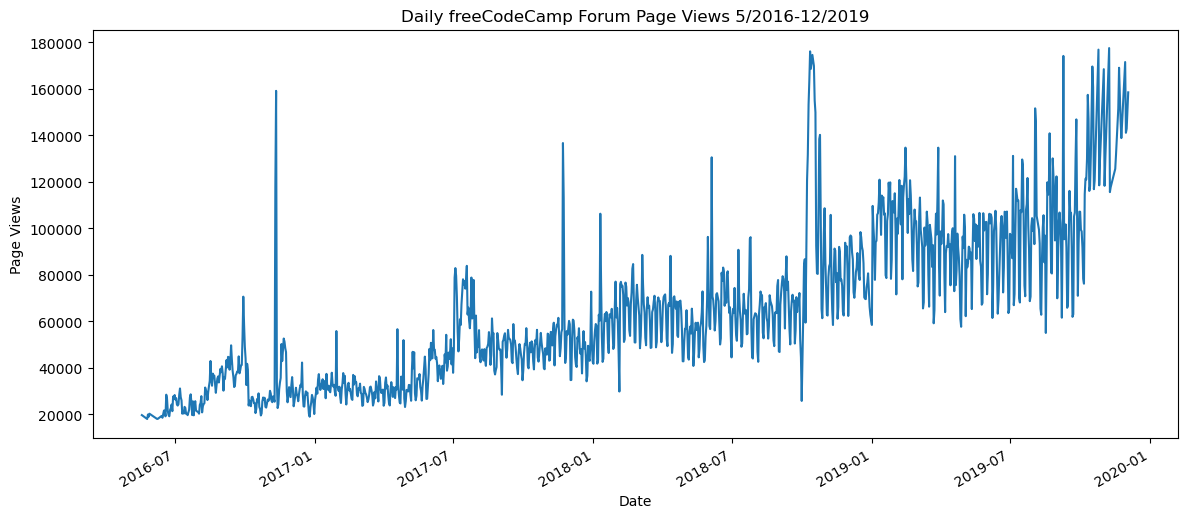

In [81]:

fig = df_filtered.plot(x="date",y="value",figsize=(14,6))
fig.set_title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
fig.set_xlabel("Date")
fig.set_ylabel("Page Views")
fig.legend().remove()



plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



•Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [ ]:
draw_bar_plot = df_filtered
draw_bar_plot = draw_bar_plot.set_index("date").groupby(pd.Grouper(freq="M")).agg({"value" : "mean"}).reset_index()
draw_bar_plot["month"] = draw_bar_plot["date"].dt.month_name()
draw_bar_plot["year"] = draw_bar_plot["date"].dt.year

display(draw_bar_plot)

In [ ]:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

draw_bar_plot['month'] = pd.Categorical(draw_bar_plot['month'], categories=ordered_months, ordered=True)

pivot = draw_bar_plot.pivot(index="year",columns="month",values="value")


print(pivot)

month        January       February         March         April           May  \
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

month          June          July         August     September        October  \
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

month       November      

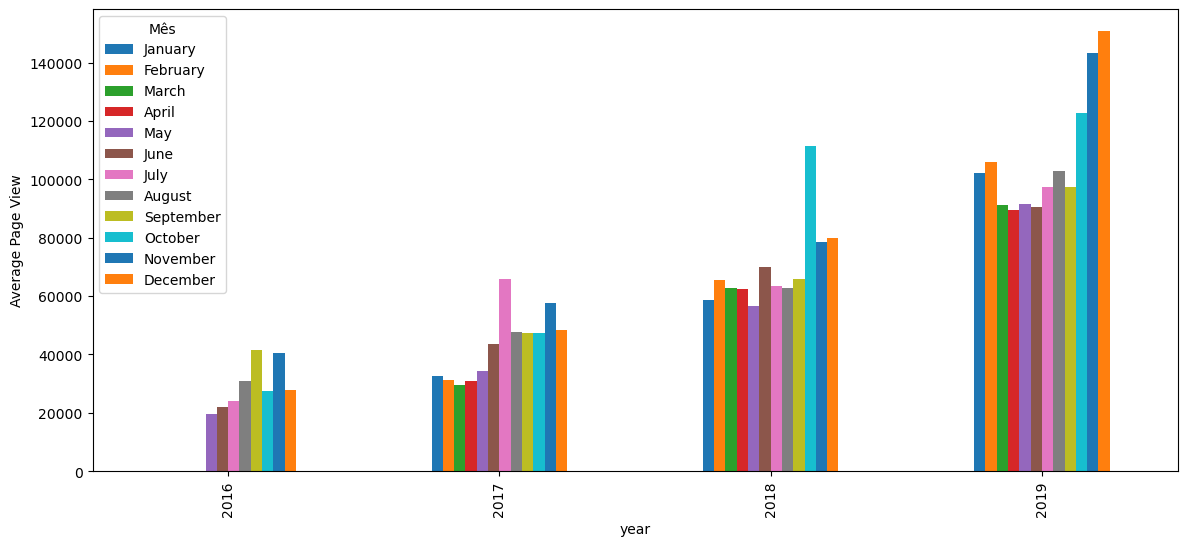

In [138]:
pivot = draw_bar_plot.pivot(index="year",columns="month",values="value")

pivot.plot(kind="bar",figsize=(14,6))
plt.legend(title="Mês")
plt.ylabel("Average Page View")
plt.show()

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



• Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [ ]:
df_filtered

,date,value,month,year
10,2016-05-19,19736,May,2016
17,2016-05-26,18060,May,2016
18,2016-05-27,19997,May,2016
19,2016-05-28,19044,May,2016
20,2016-05-29,20325,May,2016
...,...,...,...,...
1294,2019-11-24,138875,November,2019
1299,2019-11-29,171584,November,2019
1300,2019-11-30,141161,November,2019
1301,2019-12-01,142918,December,2019


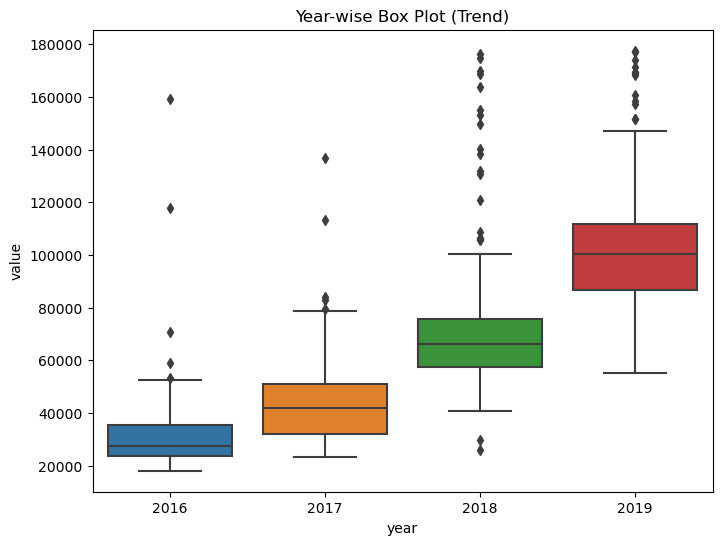

In [26]:
plt.figure(figsize=(8,6))
draw_box_plot_year = sns.boxplot(df_filtered,x="year",y="value")
plt.title("Year-wise Box Plot (Trend)")
plt.show()

C:\Users\x07124886180\AppData\Local\Temp\ipykernel_15700\2383423982.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draw_box_plot_month['date'] = pd.to_datetime(draw_box_plot_month["date"])
C:\Users\x07124886180\AppData\Local\Temp\ipykernel_15700\2383423982.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draw_box_plot_month["month"] = draw_box_plot_month["date"].dt.month_name()
C:\Users\x07124886180\AppData\Local\Temp\ipykernel_15700\2383423982.py:9: SettingWithCopyWarning: 
A value is trying to be 

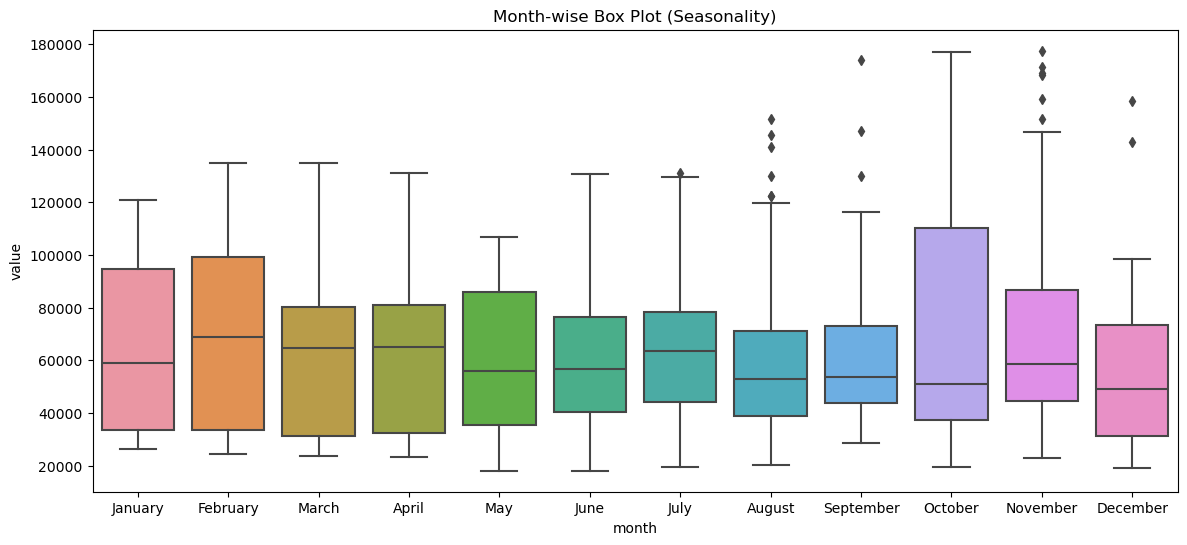

In [27]:
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']



draw_box_plot_month = df_filtered
draw_box_plot_month['date'] = pd.to_datetime(draw_box_plot_month["date"])
draw_box_plot_month["month"] = draw_box_plot_month["date"].dt.month_name()
draw_box_plot_month["year"] = draw_box_plot_month["date"].dt.year

draw_box_plot_month['month'] = pd.Categorical(draw_box_plot_month['month'], categories=ordered_months, ordered=True) # this line order the months



plt.figure(figsize=(14,6))
sns.boxplot(draw_box_plot_month,x="month",y="value")
plt.title("Month-wise Box Plot (Seasonality)")

plt.show()




![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)



C:\Users\x07124886180\AppData\Local\Temp\ipykernel_15700\3883394232.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  draw_box_plot_month['month'] = pd.Categorical(draw_box_plot_month['month'], categories=ordered_months, ordered=True) # this line order the months
c:\Users\x07124886180\AppData\Local\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


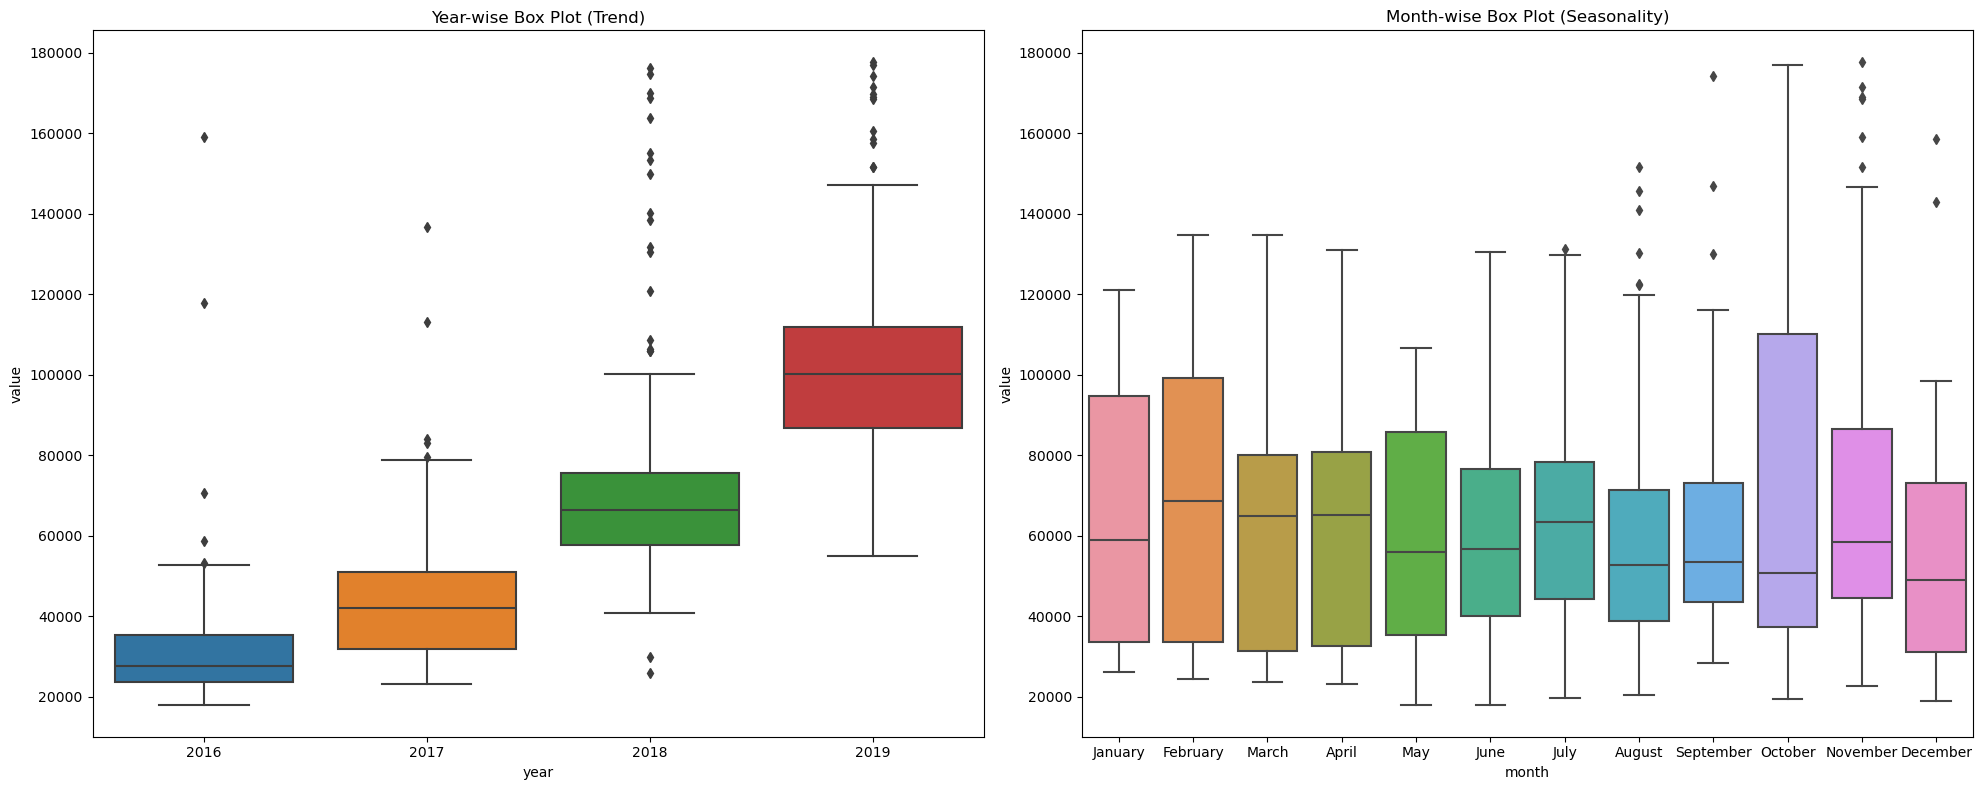

In [35]:
draw_box_plot = df_filtered

ordered_months = ['January', 'February', 'March', 'April', 'May', 'June',
                  'July', 'August', 'September', 'October', 'November', 'December']

draw_box_plot_month['month'] = pd.Categorical(draw_box_plot_month['month'], categories=ordered_months, ordered=True) # this line order the months


fig,(ax1,ax2) = plt.subplots(nrows=1, ncols=2,figsize=(20,8))

sns.boxplot(draw_box_plot,x="year",y="value",ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)")

sns.boxplot(draw_box_plot,x="month",y="value",ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")


plt.tight_layout()
plt.show()